#**Project: Exploratory Data Analysis on Seattle Airbnb Data**


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

##**Dataset Description**

#### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

#PART 1: Data Understanding

There are 3 files in the dataset:

**listing.csv:** provides information about hosts, price, room types, property types, listing summary, number of reviews etc. about 3818 Airbnb listings in Seattle.
There are 44 columns with missing data ranging from 0.01% to 100% missing
Columns with the most missing data are: license, square feet, monthly_price, security deposit, weekly_price, notes, etc.
There are 2751 hosts in the data and 20% of them are superhosts (Read: What is Superhost )

**calendar.csv:** provides information about occupancy and availability for 2873 listing everyday from January 2016 - January 2017
There are 4 columns in the calendar dataset: listing ID, Date, Availability (t: available, f: occupied), Price
If the listing is occupied, there will be price for that listing for that date. Therefore, price is the only column with N/A value in this dataset.

**reviews.csv:** provides 84849 reviews for each property from 2009
About 3191 listings have about 85k reviews from 2009-2016
18 of these reviews have missing comments
The following Airbnb data is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day


In [ ]:
#importing libraries
import pandas as pd
import numpy as np

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

###**Import Libraries**

In [ ]:
# import datasets
calendar = pd.read_csv('/content/calendar.csv')
listings = pd.read_csv('/content/listings.csv')
reviews = pd.read_csv('/content/reviews.csv')


In [ ]:
print("Listing dataset has %2d records and %2d columns" %(listings.shape[0],listings.shape[1]))
print("Calendar dataset has %2d records and %2d columns" %(calendar.shape[0],calendar.shape[1]))
print("Review dataset has %2d records and %2d columns" %(reviews.shape[0],reviews.shape[1]))

Listing dataset has 3818 records and 92 columns
Calendar dataset has 1393570 records and  4 columns
Review dataset has 84849 records and  6 columns


#**a. Inspect Listing Dataset**

In [ ]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [ ]:
#number of unique hosts
unique_host = listings['host_id'].unique()
'Number of unique hosts in listing dataset:', len(unique_host)

('Number of unique hosts in listing dataset:', 2751)

In [ ]:
#find number of listings and number of hosts
listings_number = listings['id'].count()
hosts_number = len(listings['host_id'].unique())

print('listings.csv dataset contains information on %d listings provided by %d hosts.' % (listings_number,
                                                                                          hosts_number))

listings.csv dataset contains information on 3818 listings provided by 2751 hosts.


In [ ]:
#find percentage of missing values for each column
listings_missing_df = listings.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]


In [ ]:
def identify_null_col(dataframe):
    """Identify columns that have missing data in the dataframe

    Args:
        dataframe: input dataframe to identify missing data

    Returns:
        dataframe: dataframe of column names as index, # missing records, % missing records
    """

    null_col = dataframe.columns[dataframe.isna().sum()>0]
    col_null_val = dataframe[null_col].isna().sum().sort_values(ascending=False)
    per_null_val = (dataframe[null_col].isna().sum()/dataframe.shape[0]*100).sort_values(ascending=False)
    nulls_df = pd.DataFrame(col_null_val,columns=['#Nulls'])
    nulls_df['%Nulls']=per_null_val
    print('Number of columns with missing data:',nulls_df.shape[0])
    return nulls_df

identify_null_col(listings)

Number of columns with missing data: 45


,#Nulls,%Nulls
license,3818,100.000000
square_feet,3721,97.459403
monthly_price,2301,60.267156
security_deposit,1952,51.126244
weekly_price,1809,47.380828
notes,1606,42.063908
neighborhood_overview,1032,27.029859
cleaning_fee,1030,26.977475
transit,934,24.463070
host_about,859,22.498690


**Observation on Missing Value for listings:**

As we see on the diagram above, we don't have information on each listing license and on amount of square feets for each listing. We can also see that there are more than 40% of missing values for weekly price, monthly price and security deposit, but we are not going to use these data in our analysis anyway, because it will obviously lead to overfitting our machine learning model.

##**b. Calendar Dataset**

In [ ]:
#how many unique listings in calendar:
unique_listing_calendar = calendar['listing_id'].unique()
'Number of unique listings in calendar dataset:', len(unique_listing_calendar)

('Number of unique listings in calendar dataset:', 3818)

In [ ]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


**Analyze missing and categorical values in order to estimate their impact on the results.**

In [ ]:
print(calendar.isnull().sum())
len(calendar)


listing_id         0
date               0
available          0
price         459028
dtype: int64


1393570

In [ ]:
identify_null_col(calendar)

Number of columns with missing data: 1


,#Nulls,%Nulls
price,459028,32.938998


##**Plot for Missing Value for Calendar:**

Looking at the missing value plot below, there are approximately 32% percent of missing values for price column for dates, when the listing was unavailable.

<Axes: title={'center': 'Missing values per column, %'}>

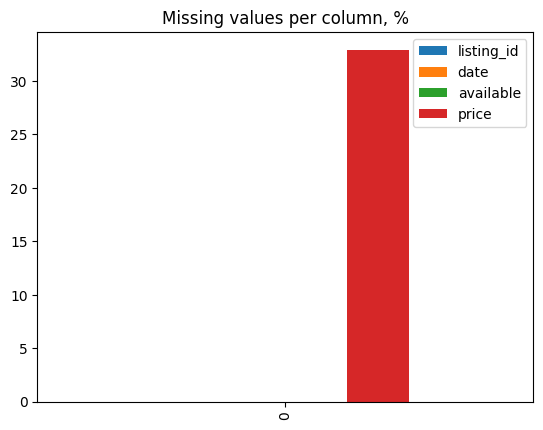

In [ ]:
#get percentage of missing values forx each column in dataset
calendar_missing_df = pd.DataFrame([calendar.isnull().mean()*100])

#plot the results
calendar_missing_df.plot.bar(title='Missing values per column, %')


**Calendar Observation:**

In the calendar dataset there are just NaN values in the price column. After a look to the data we can determine that this is associated to the listings that are not available, so no deeper data treatment is needed in this case.

##**c. Review Dataset:**

In [ ]:
print(reviews.isnull().sum())
len(reviews)

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


84849

In [ ]:
print('Number of unique listings in review dataset:',len(reviews['listing_id'].unique()))
print('Number of reviews', reviews.shape[0])
reviews.head()

Number of unique listings in review dataset: 3191
Number of reviews 84849


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
identify_null_col(reviews)

Number of columns with missing data: 1


,#Nulls,%Nulls
comments,18,0.021214


In [ ]:
# Number of missing data in comments field (review dataset)
print('%2d missing rows in comments field' %reviews['comments'].isna().sum())

18 missing rows in comments field



**Reviews Observation:**

In the reviews dataset there are just missing values in the comments columns, and not a considerable number worth studying. This insight means that 18 people did not leave a comment when doing the review so, again, no deeper treatment is needed.

<a id='wrangling'></a>
## **Data Wrangling:**

The dataset will be cleaned and preprocessed in this section. Different data wrangling would be carried out.

Such as
1. Multiple dataset will be merged into one using the listing identifier for each analysis.
2. Handling missing values
3. Converting price and dates from string to numerical value.

Steps will be documented and reasoning will be carefully provided for every decision taken.


**Initial Insights**
Before diving deep into data, let's find out some general information on how the reservation price is determined and search for some useful facts for the future analysis.

AirBnB reservation price is based on following costs (according to AirBnB official website information):



Time of the year, when reservation is made, affects the price;
Amenities offered like Wi-Fi and TV should be considered in the analysis, as they also might have great influence on price;
It is better to use neighbourhood information rather then exact coordinates to describe the listing location, because sometimes even close locations might have huge difference in listing prices, if they belong to different neighbourhoods or are located different sides of the river.





In [ ]:
# Create copy of original dataframes
cal = calendar.copy()
lis = listings.copy()
rev = reviews.copy()

**Calendar:**


In [ ]:
cal['listing_id'].nunique()

3818

In [ ]:
# Creating a new feature extracting month of the date to see the unique houses listed every month
cal['mon'] = pd.DatetimeIndex(cal['date']).month
cal.groupby('mon')['listing_id'].nunique()

mon
1     3818
2     3818
3     3818
4     3818
5     3818
6     3818
7     3818
8     3818
9     3818
10    3818
11    3818
12    3818
Name: listing_id, dtype: int64

In [ ]:
# Drop nulls in column price since any kind of imputation may not be best here
print(len(cal))
cal.dropna(subset=['price'], inplace=True)

#validating
print(len(cal))

1393570
934542


In [ ]:
# Fix datatypes for certain columns
cal['date'] = pd.to_datetime(cal['date'])

In [ ]:
# Strip off '$' from price since all are dollar and we need to analyze price as a number
cal['price'] = cal['price'].str[1:]

# Replace ',' from the price and then convert it to float
cal['price'] = cal['price'].apply(lambda x: float(x.split()[0].replace(',', '')))

**Listings**

In [ ]:
# Drop columns not relevant to our analyses
col = ['summary','name','space','description','experiences_offered','neighborhood_overview','notes','transit', \
       'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url',\
       'host_picture_url','street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', \
       'square_feet', 'calendar_updated','requires_license', 'weekly_price', 'monthly_price', \
       'first_review','last_review','host_name','host_location']

lis.drop(col, axis =1, inplace=True)
#lis.drop('security_deposit', axis=1, inplace=True)

In [ ]:
# Rename columns
col = {'market': 'city',
       'extra_people' : 'extra_people_price'}
lis.rename(columns=col, inplace=True)

In [ ]:
# Strip off '$' from all the price columns since all are dollar and we need to analyze price as a number
lis['price'] = lis['price'].str[1:]
lis['extra_people_price'] = lis['extra_people_price'].str[1:]
lis['cleaning_fee'] = lis['cleaning_fee'].str[1:]

# Replace NaN with 0 for cleaning_fee
lis['cleaning_fee'] = lis['cleaning_fee'].fillna('0')

# Replace ',' from the price and then convert it to float
lis['price'] = lis['price'].apply(lambda x: float(x.split()[0].replace(',', '')))
lis['extra_people_price'] = lis['extra_people_price'].apply(lambda x: float(x.split()[0].replace(',', '')))
lis['cleaning_fee'] = lis['cleaning_fee'].astype(float)

In [ ]:
# Create new features
lis['security_deposit_Y/N'] = np.where(lis.security_deposit.isnull(), 0, 1)
lis[['security_deposit_Y/N','security_deposit']]

#Drop original column security_deposit
lis.drop('security_deposit', axis=1, inplace=True)

In [ ]:
# Remove % from 'host_response_rate', and 'host_acceptance_rate'
lis['host_response_rate'] = lis['host_response_rate'].str[:-1]
lis['host_acceptance_rate'] = lis['host_acceptance_rate'].str[:-1]

# Replace NaN with 0 (assuming these hosts didn't get rating)
lis['host_response_rate'] = lis['host_response_rate'].fillna('0')
lis['host_acceptance_rate'] = lis['host_acceptance_rate'].fillna('0')

# Convert data type
lis['host_response_rate'].astype(int)
lis['host_acceptance_rate'].astype(int)

0       100
1       100
2       100
3         0
4         0
       ... 
3813    100
3814    100
3815      0
3816      0
3817      0
Name: host_acceptance_rate, Length: 3818, dtype: int64

In [ ]:
#Create new features: 'Number of years host has been active for'
lis['host_since'] = pd.to_datetime(lis['host_since'])
lis['host_active_years'] = round((pd.datetime.now() - lis['host_since']).dt.days / 365,1)
lis.drop('host_since', axis=1, inplace=True)

<ipython-input-29-78b74423b657>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  lis['host_active_years'] = round((pd.datetime.now() - lis['host_since']).dt.days / 365,1)


In [ ]:
# Count number of amenities provided
lis['num_of_amenities'] = lis['amenities'].apply(lambda col: col.count(',')+1)

# Count number of verifications
lis['num_of_verifications'] = lis['host_verifications'].apply(lambda col: col.count(',')+1)

In [ ]:
# Handle misisng values in numeric columns
num_col = lis.select_dtypes(include=['float', 'int']).copy().columns

for col in num_col:
    lis.update(lis[col].fillna(0))

In [ ]:
# Converting binary t/f to 1/0
binary_mapping = {'f': 0, 't': 1}
cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability', \
'instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
lis[cols] = lis[cols].apply(lambda x: x.map(binary_mapping))

In [ ]:
# Handle misisng values in categorical columns
lis.update(lis['zipcode'].fillna('99999'))

In [ ]:
# Check zipcode length and fix is required
lis.update(lis[lis['zipcode'].str.len()>5]['zipcode'].str[3:])

In [ ]:
# Check on the 2 records with no profile pic
lis[lis.host_has_profile_pic.isna()]

# Most of the scores / reviews for these 2 hosts is 0 or not available. Furthermore these hosts have also not been verified. So we should delete these records from the dataframe
lis.dropna(subset=['host_has_profile_pic'], inplace=True)

In [ ]:
# Create dummy variable for a few categorical columns
cat_cols = ['host_response_time', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
for col in cat_cols:
    lis = pd.concat([lis,
                     pd.get_dummies(lis[col], prefix=col, prefix_sep='_', drop_first=True)],
                    axis=1)

###**Reviews**

In [ ]:
# Drop null review since that is the key column in this table and can't be imputed; also null values are only a few
rev.dropna(subset=['comments'], inplace=True)

In [ ]:
# Fix datatypes for certain columns
rev['date'] = pd.to_datetime(rev['date'])

In [ ]:
# Creating a new feature extracting Month of the date
rev['mon'] = pd.DatetimeIndex(rev['date']).month

##**Data Validation**

In [ ]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
 4   mon         934542 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 42.8+ MB


In [ ]:
cal.head()

,listing_id,date,available,price,mon
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1


In [ ]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Data columns (total 91 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     3816 non-null   int64  
 1   listing_url                            3816 non-null   object 
 2   scrape_id                              3816 non-null   int64  
 3   last_scraped                           3816 non-null   object 
 4   host_id                                3816 non-null   int64  
 5   host_response_time                     3295 non-null   object 
 6   host_response_rate                     3816 non-null   object 
 7   host_acceptance_rate                   3816 non-null   object 
 8   host_is_superhost                      3816 non-null   float64
 9   host_neighbourhood                     3518 non-null   object 
 10  host_listings_count                    3816 non-null   float64
 11  host

In [ ]:
lis.head()

,id,listing_url,scrape_id,last_scraped,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,956883,within a few hours,96,100,0.0,Queen Anne,...,0,0,0,0,0,0,0,1,1,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,5177328,within an hour,98,100,1.0,Queen Anne,...,0,0,0,0,0,0,0,1,0,1
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,16708587,within a few hours,67,100,0.0,Queen Anne,...,0,0,0,0,0,0,0,1,0,1
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,9851441,NaN,0,0,0.0,Queen Anne,...,0,0,0,0,0,0,0,1,0,0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,1452570,within an hour,100,0,0.0,Queen Anne,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
lis.describe()

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
count,3.816000e+03,3.816000e+03,3.816000e+03,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,...,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,5.548149e+06,2.016010e+13,1.578241e+07,0.203878,7.157757,7.157757,0.998166,0.785377,47.628967,-122.333096,...,0.000786,0.000262,0.303983,0.030660,0.003407,0.019392,0.012317,0.957809,0.327568,0.371331
std,2.962118e+06,0.000000e+00,1.457927e+07,0.402932,28.628149,28.628149,0.042796,0.410614,0.043062,0.031751,...,0.028031,0.016188,0.460036,0.172418,0.058275,0.137917,0.110309,0.201051,0.469388,0.483224
min,3.335000e+03,2.016010e+13,4.193000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,47.505088,-122.417219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.257399e+06,2.016010e+13,3.282834e+06,0.000000,1.000000,1.000000,1.000000,1.000000,47.609415,-122.354329,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,6.117836e+06,2.016010e+13,1.055814e+07,0.000000,1.000000,1.000000,1.000000,1.000000,47.623606,-122.328863,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.033796e+06,2.016010e+13,2.590102e+07,0.000000,3.000000,3.000000,1.000000,1.000000,47.662734,-122.310795,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,1.000000,502.000000,502.000000,1.000000,1.000000,47.733358,-122.240607,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84831 non-null  int64         
 1   id             84831 non-null  int64         
 2   date           84831 non-null  datetime64[ns]
 3   reviewer_id    84831 non-null  int64         
 4   reviewer_name  84831 non-null  object        
 5   comments       84831 non-null  object        
 6   mon            84831 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.2+ MB


In [ ]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,mon
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,8


# **Exploratory Data Analysis**

> This stage will show visualization of the datasets withj the aim to answer all research question in this project. Each variable will be analyzed and the correlation between each variable will be discussed.


#**Approach**
First of all, I chose Seattle dataset, and it will take me the following steps to come into conclusions about factors, affecting reservation prices:

**1. The first look at the data:**
* what information we have?
* what information is missing?
* discover general facts: time period, total number of * listings in the dataset,

**2. Initial data preparation:**
* remove the irrelevant information;
* reformat the information and imputing missing values;
3. High level analysis:
* find out high level trends and correlations;
  


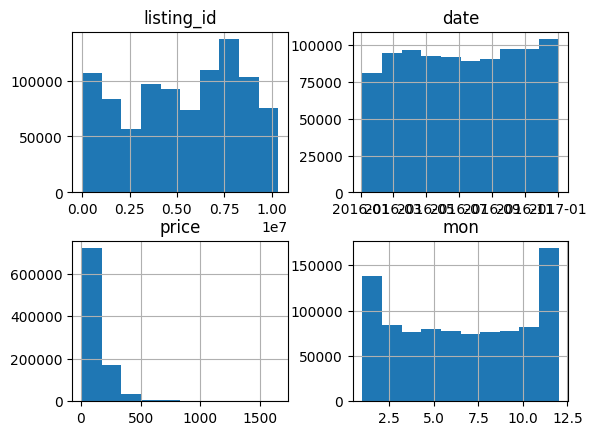

In [ ]:
cal.hist();

In [ ]:
#Viewing the dataset
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [ ]:

        #Main dataset cleaning function
def clean_dataset(listings, calendar):
    '''
    INPUT
    listings_df - pandas dataframe containing listings data
    calendar_df - pandas dataframe containing calendar data

    OUTPUT
    df - cleaned dataset, which contains merged tables:
    1. irrelevant columns are dropped;
    2. string containing dates are converted into numbers;
    3. columns, containing lists, are split into several columns (for example, amenities)
    4. missing values are imputed with mean or mode.
    '''
#merge datasets
    listings_df = listings.rename(index=str, columns={"id": "listing_id"})
    df = pd.merge(calendar, listings_df, on = 'listing_id')
#delete columns with url
    df = listings.loc[:, ~listings_df.columns.str.endswith('url')]

In [ ]:
# delete columns with url
df = listings.loc[:, ~listings.columns.str.endswith('url')]

###**Find missing values and Cleaning**

In [ ]:
# Review whether there are any missing values in price
df['price'].isnull().sum()

0

In [ ]:
# conversion of $ price into float
df['price'] = df.price.str.replace('[$,]', '',regex=True).astype('float')

<ipython-input-54-d9db8292d3df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df.price.str.replace('[$,]', '',regex=True).astype('float')


In [ ]:
# number of columns with no missing values
cnt_without_nan = len(df.columns[df.isnull().sum()==0])
cnt_without_nan

44

In [ ]:
# number of columns with missing values
cnt_with_nan = len(df) - cnt_without_nan
cnt_with_nan

3774

Most of the columns seems to have missing values. Important step will be to find columns with only missing values. If that is the case, to remove them from data set. Because there is no need for them to be applied for this analysis

In [ ]:
df.columns[df.isnull().all()]

Index(['license'], dtype='object')

In [ ]:
df = df.drop(['license'], axis=1)

**Observation:**

Detecting the columns with mainly missing values (50%) and (75%).

In [ ]:
df.columns[df.isnull().sum()/len(df) > 0.75]

Index(['square_feet'], dtype='object')

In [ ]:
df.columns[df.isnull().sum()/len(df) > 0.50]

Index(['square_feet', 'monthly_price', 'security_deposit'], dtype='object')

Interesting, that the most non filled fields are ‘monthly price’, ‘square feet’ and ‘security deposit’

In [ ]:
df_to_test = df.dropna(subset=['square_feet', 'monthly_price', 'security_deposit'], how='any')
df_to_test['monthly_price']

103     $1,795.00
163     $2,552.00
234     $2,500.00
381       $520.00
390     $5,000.00
581     $3,000.00
831     $2,999.00
911     $3,600.00
1187    $1,700.00
1786      $600.00
1836    $2,240.00
1847    $1,600.00
1851    $3,000.00
1870    $1,400.00
1891    $2,800.00
1973    $1,075.00
1997    $1,175.00
2046    $2,200.00
2228    $1,725.00
2303    $1,995.00
2436    $1,900.00
2634    $4,999.00
2652    $1,500.00
2824    $6,850.00
3228    $1,900.00
3480    $1,500.00
3483    $1,400.00
3548    $2,500.00
3810    $5,500.00
Name: monthly_price, dtype: object

In [ ]:
# conversion of $ price into float
df_to_test['monthly_price'] = df.monthly_price.str.replace('[$,]', '',regex=True).astype('float')

<ipython-input-69-b13f5a85f244>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_test['monthly_price'] = df.monthly_price.str.replace('[$,]', '',regex=True).astype('float')


[Text(0.5, 0, 'monthly price')]

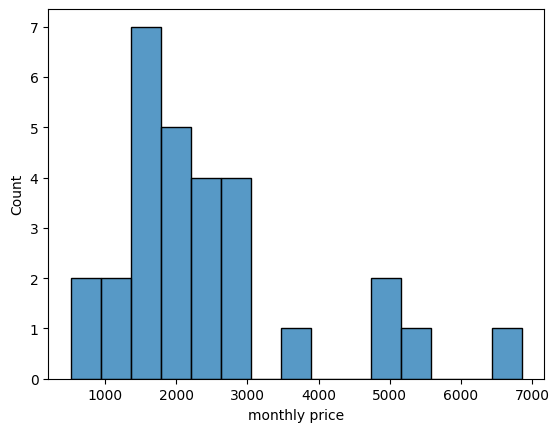

In [ ]:
sns.histplot(data=df_to_test, x="monthly_price",bins=15).set(xlabel='monthly price')

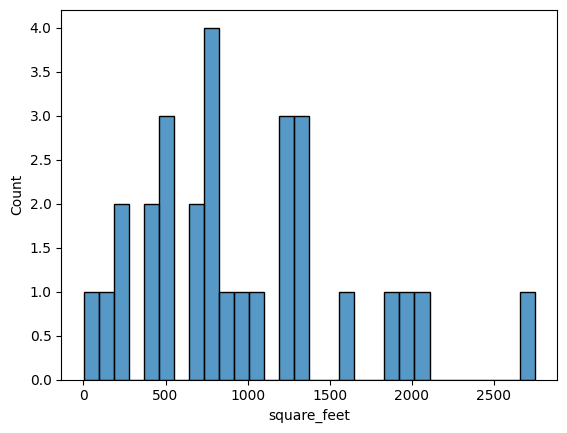

In [ ]:
sns.histplot(data=df_to_test, x="square_feet",bins=30);

**Observation:**

It is noticeable, that the renter tends to specify the field “square feet” mostly for big premises. In addition, it is to expect, that the monthly payment is the exception. Due to the business model of “Airbnb” rental for the short time.


**Here, we look at a representation of the data distribution**

<ipython-input-71-9e11832163f0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax);


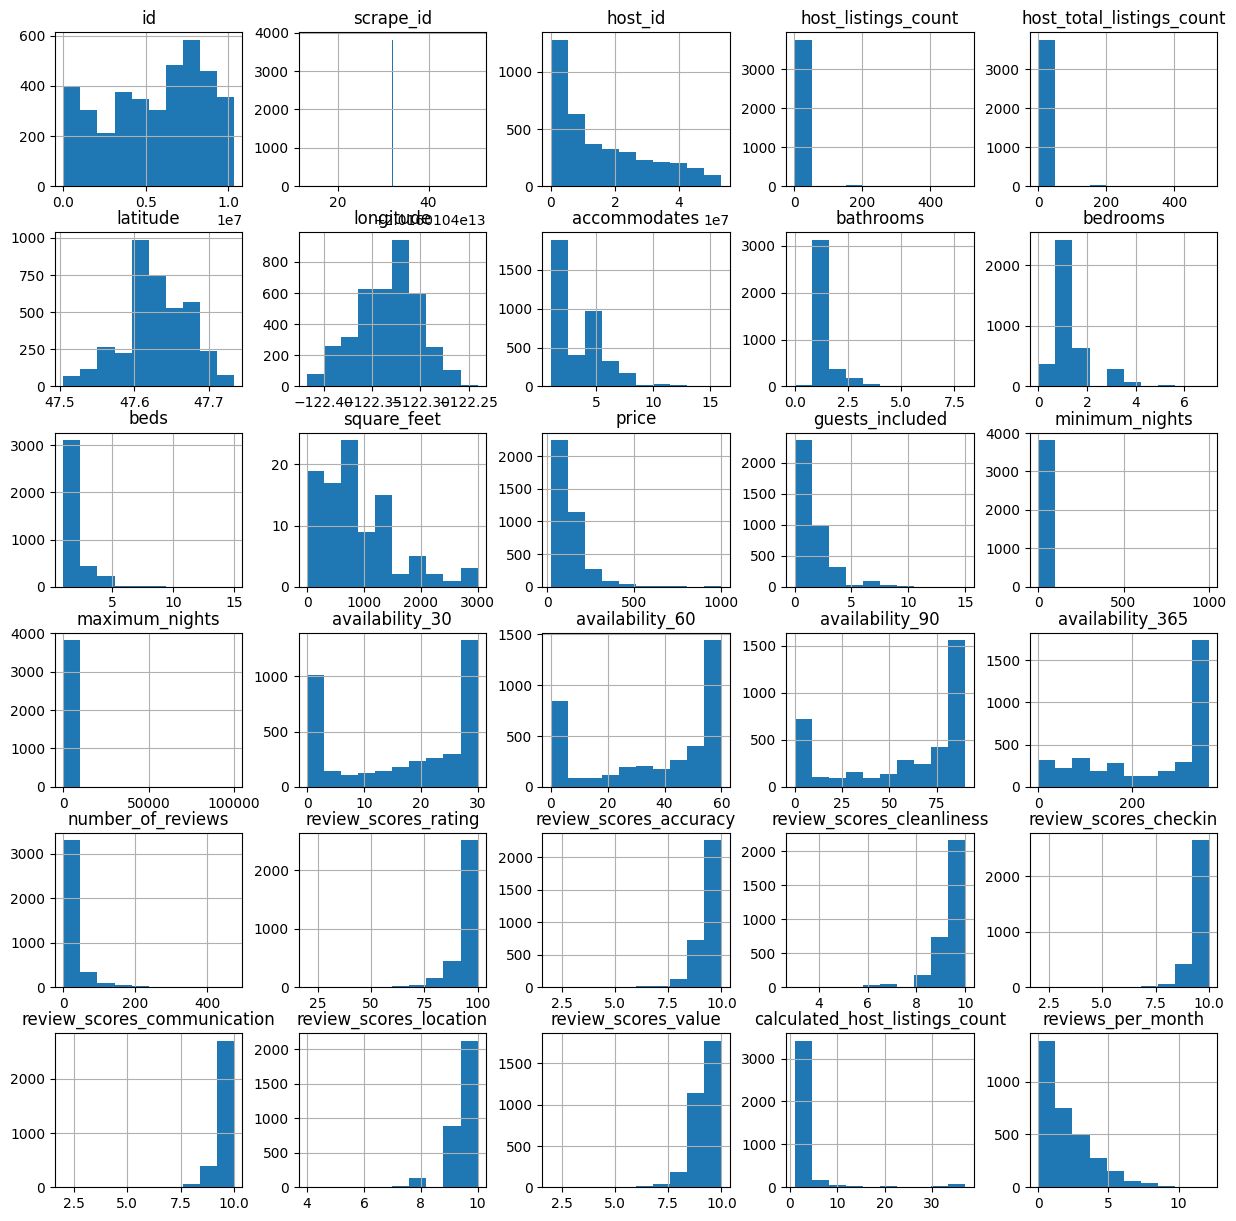

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

###Correlation Analysis

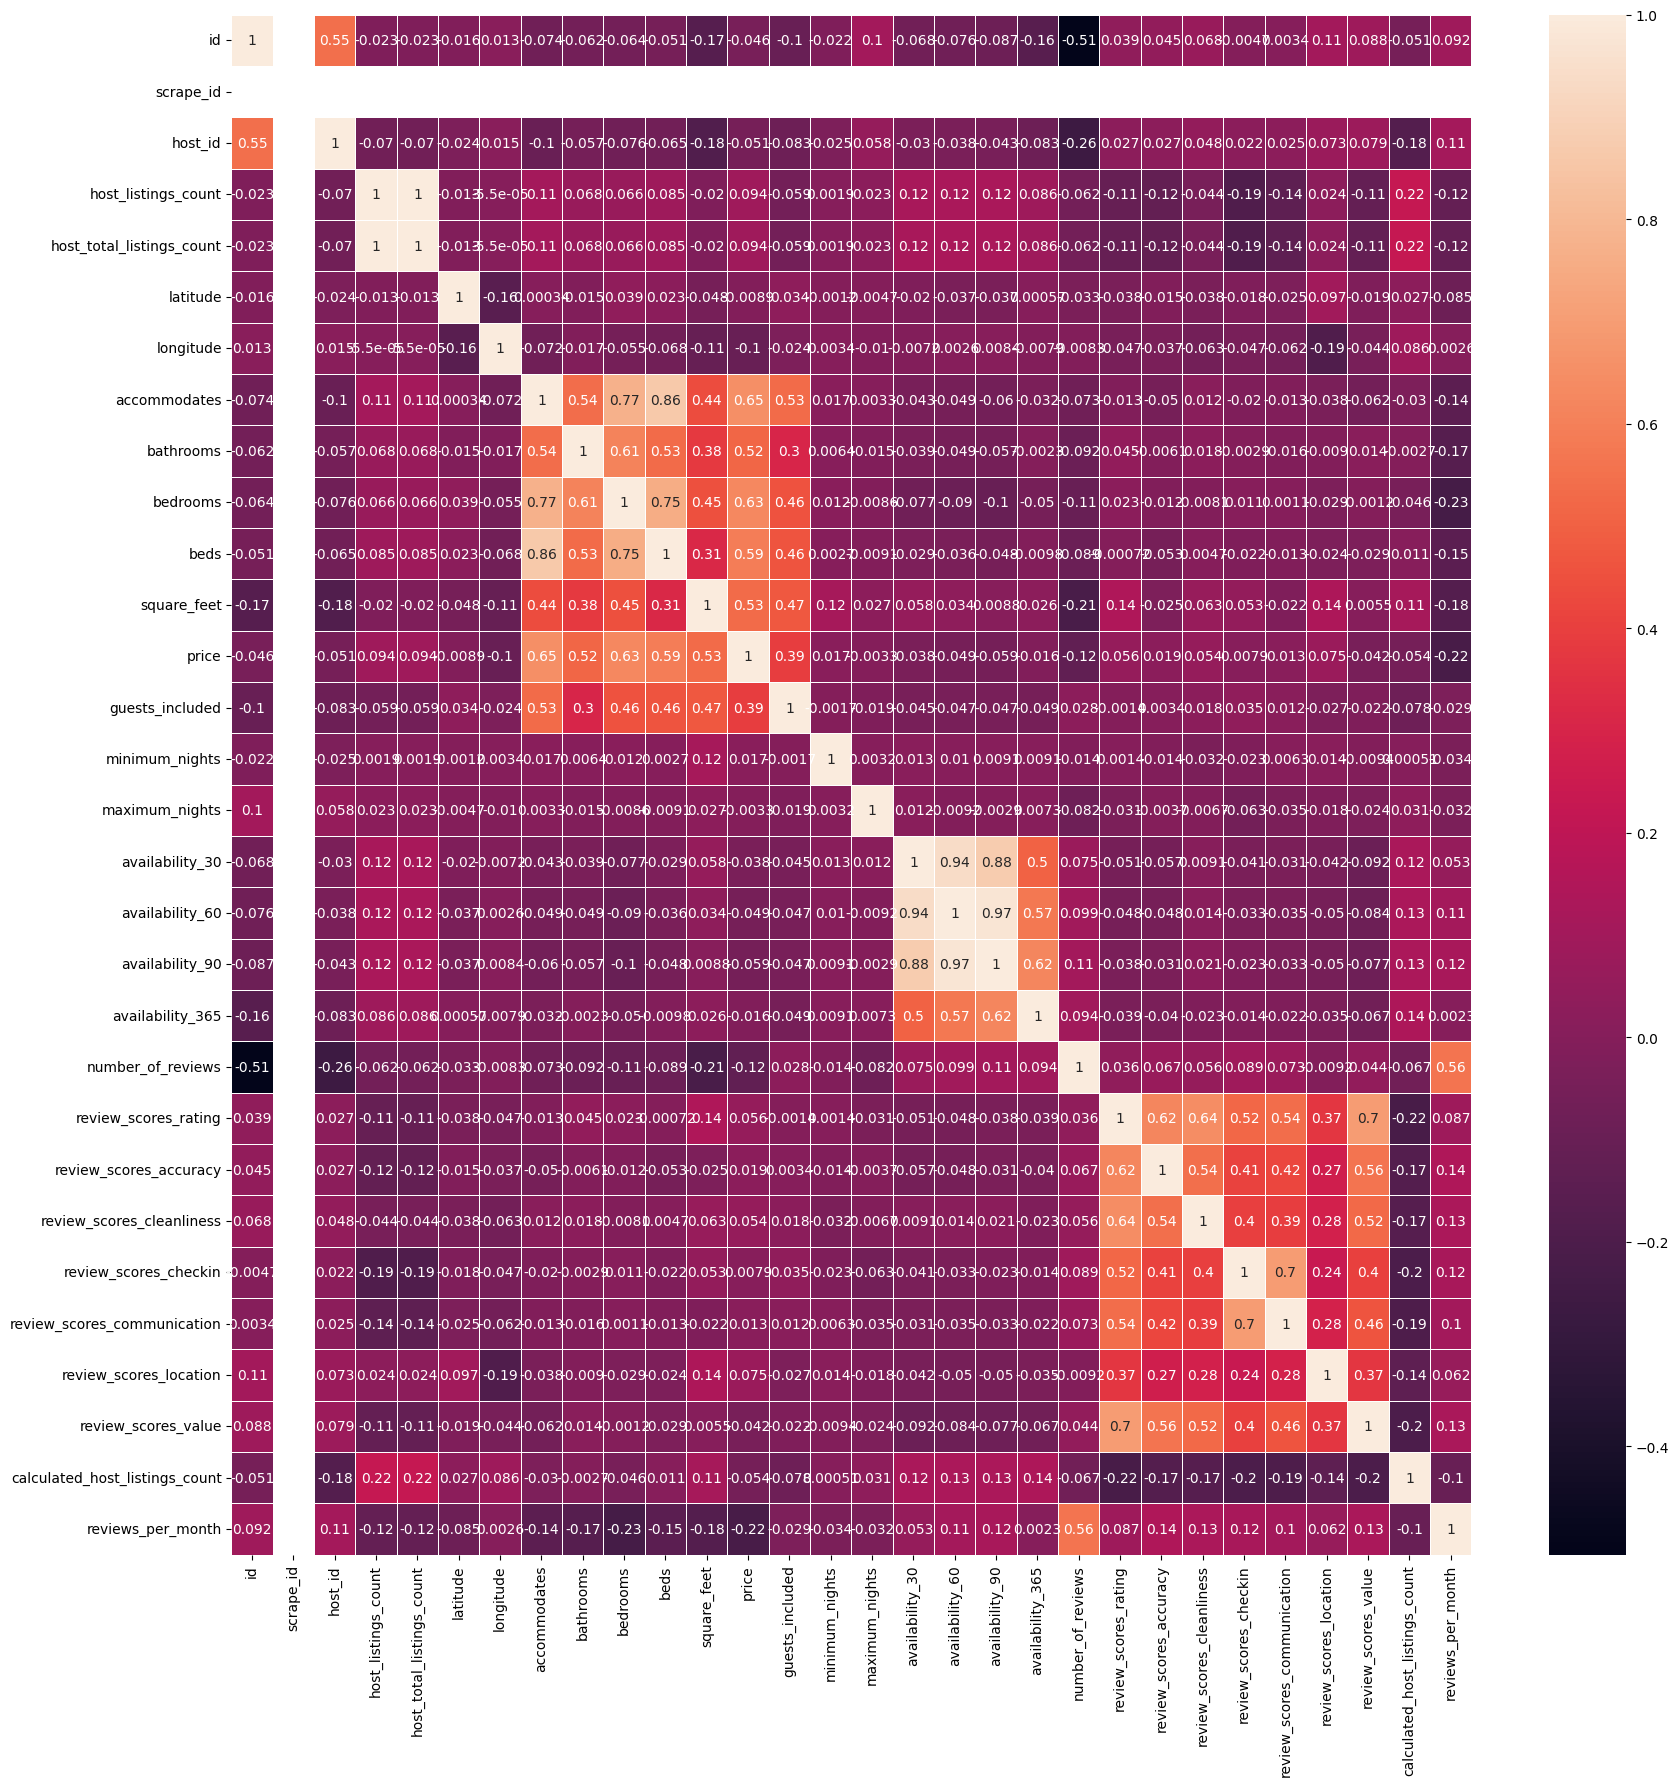

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax);

**Correlation Analysis:**


The matrix demonstrates that there is a strong positive correlation  between features like bedrooms and beds or accommodations and beds. It's vital to consider the correlations between price and certain other attributes since this analysis focuses on the pricing. One the one hand, square footage, beds, bathrooms, and bedrooms are all closely connected with price. You frequently pay more for greater needs.

On the other side, the quantity of reviews has no beneficial effect on the cost. To determine if the reviews are positive or if there are many complaints, a sentiment analysis of the reviews is necessary in this situation.


#**Research Questions:**

Findings answers to the business questions identified:

- **Research Question 1:** How does the property type influence the price of the property and How/why does price of the house vary through out the year ?

- **Research Question 2:** What has been the most busiest time in Seattle?

- **Research Question 3:** How does the neighborhood impact the prices of an Airbnb.

### **Research Question 1:**

**"How does the property type influence the price of the property and How/why does price of the house vary through out the year ?"**

First of all, we look at the price’s distribution)**

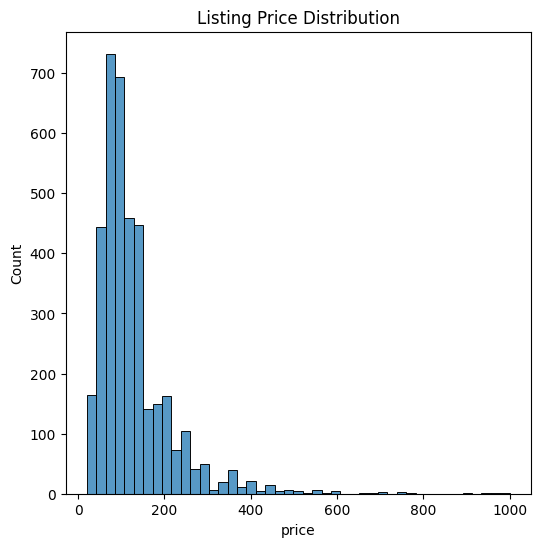

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(data=df, x="price",bins=45).set(title="Listing Price Distribution");

The price is approximately normally distributed with some outliers

In [ ]:
df.price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

We can see that the rental price is from 20 dollar up to 1000 dollar, the mean 128 dollar. Due to the big price range, that should be another factor which influence the rental costs. For that reason, we should look closely at the price distribution and type of the rental.

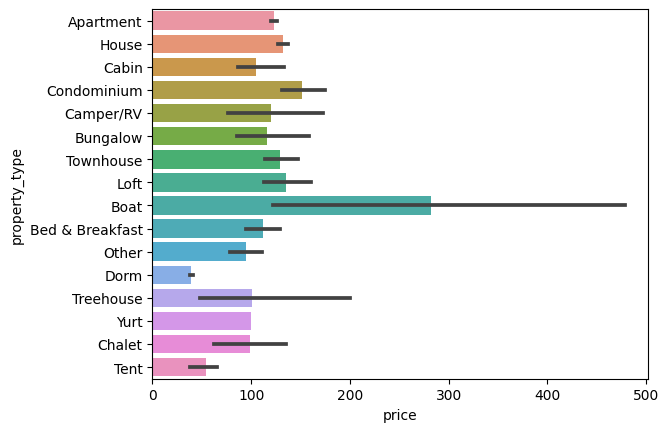

In [ ]:
sns.barplot(x="price", y="property_type", data=df);

The pictures shows that the “Boat” and “Treehouse” have the outliers considering the prices.

The next stage will be to carefully examine the price ranges for various rental types and to contrast the requests and offers.

In [ ]:
df_statistic = df.groupby(['property_type'])['price'].describe().reset_index()
df_statistic

,property_type,count,mean,std,min,25%,50%,75%,max
0,Apartment,1708.0,122.932670,66.617706,20.0,85.00,110.0,149.00,999.0
1,Bed & Breakfast,37.0,112.054054,55.840022,30.0,70.00,99.0,146.00,299.0
2,Boat,8.0,282.375000,281.327434,75.0,92.50,150.0,356.75,775.0
3,Bungalow,13.0,115.615385,75.226922,65.0,75.00,95.0,110.00,349.0
4,Cabin,21.0,104.666667,55.218053,52.0,85.00,95.0,100.00,300.0
5,Camper/RV,13.0,120.461538,95.375237,45.0,75.00,82.0,120.00,375.0
6,Chalet,2.0,98.500000,51.618795,62.0,80.25,98.5,116.75,135.0
7,Condominium,91.0,151.109890,111.091099,50.0,99.00,115.0,155.00,700.0
8,Dorm,2.0,39.500000,2.121320,38.0,38.75,39.5,40.25,41.0
9,House,1733.0,132.351414,106.877963,25.0,65.00,95.0,165.00,1000.0


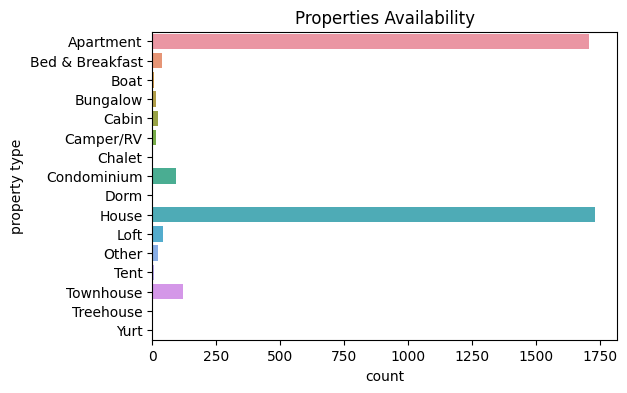

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="count", y="property_type", data=df_statistic).set(ylabel="property type", title="Properties Availability");

The figure above shows that the most common rental types are **"apartments and houses"**

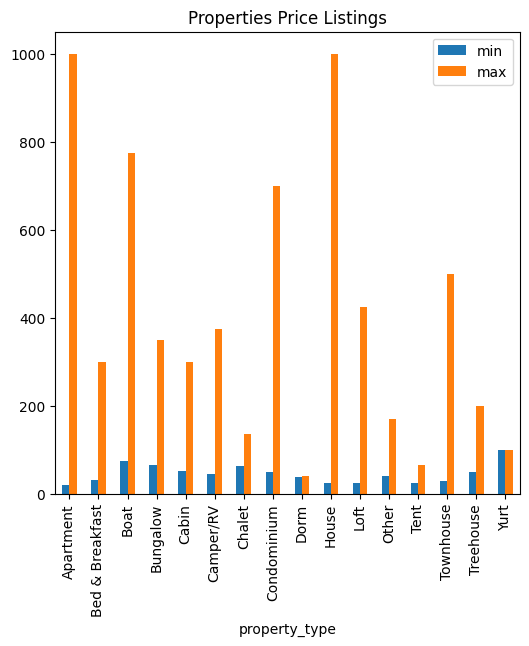

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
df_statistic.plot(x="property_type", y=["min", "max"], kind="bar", ax=ax).set(title="Properties Price Listings");

In [ ]:
# finding the mode price for the property_type
df.groupby(['property_type'])['price'].agg(pd.Series.mode)

property_type
Apartment                         100.0
Bed & Breakfast                    99.0
Boat                              150.0
Bungalow                           70.0
Cabin               [85.0, 99.0, 100.0]
Camper/RV                          75.0
Chalet                    [62.0, 135.0]
Condominium                       150.0
Dorm                       [38.0, 41.0]
House                              55.0
Loft                              100.0
Other              [40.0, 121.0, 150.0]
Tent                               65.0
Townhouse                         150.0
Treehouse           [48.0, 55.0, 200.0]
Yurt                              100.0
Name: price, dtype: object

**Observation:**

To sum up, depending on the type of the property the price can vary. Especially, the most common rental types such as “Apartment” or “House” have a very big price range (20/999 and 25/1000 respectively). However, the mode for “Apartment” and “House” is moderate (100/55).





**b. In answering  how and why the price of the house vary through out the year we use the grapical analysis below:**

Here we first visualize the price  per night
The average prices per night and analyze the houses that are very expensive.

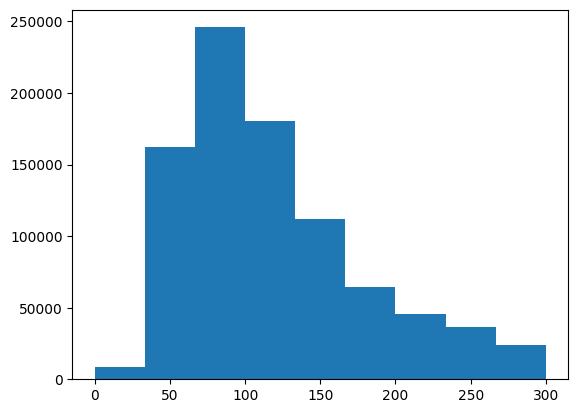

In [ ]:
# Visualizing the per night price
bins=np.linspace(0,300,10)
plt.hist(cal['price'], bins=bins);

In [ ]:
# Average per night price
cal.price.mean()

137.94485855103355

In [ ]:
# Check the houses that are very expensive
lis[lis['price']>500]

,id,listing_url,scrape_id,last_scraped,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,16708587,within a few hours,67,100,0.0,Queen Anne,...,0,0,0,0,0,0,0,1,0,1
19,6291829,https://www.airbnb.com/rooms/6291829,20160104002432,2016-01-04,32713558,NaN,0,0,0.0,Queen Anne,...,0,0,0,0,0,0,0,1,0,0
24,6362362,https://www.airbnb.com/rooms/6362362,20160104002432,2016-01-04,33147763,NaN,0,0,0.0,Queen Anne,...,0,0,0,0,0,0,0,1,1,0
239,7733192,https://www.airbnb.com/rooms/7733192,20160104002432,2016-01-04,24633415,within an hour,100,100,1.0,Queen Anne,...,0,0,0,0,0,0,0,1,1,0
251,4250367,https://www.airbnb.com/rooms/4250367,20160104002432,2016-01-04,919364,within a few hours,90,100,0.0,Kaanapali,...,0,0,0,0,0,0,0,1,0,0
319,3066740,https://www.airbnb.com/rooms/3066740,20160104002432,2016-01-04,15606907,NaN,0,0,0.0,NaN,...,0,0,0,0,0,0,0,1,0,0
356,5128160,https://www.airbnb.com/rooms/5128160,20160104002432,2016-01-04,26509491,within a few hours,100,100,0.0,Wallingford,...,0,0,0,0,0,0,0,1,1,0
529,368403,https://www.airbnb.com/rooms/368403,20160104002432,2016-01-04,4186078,within a few hours,100,100,0.0,Green Lake,...,0,0,0,0,0,0,0,1,0,1
565,5534463,https://www.airbnb.com/rooms/5534463,20160104002432,2016-01-04,19861136,within a few hours,100,100,0.0,Westlake,...,0,0,0,0,0,0,0,1,0,1
1070,3385421,https://www.airbnb.com/rooms/3385421,20160104002432,2016-01-04,16255476,within a few hours,100,100,1.0,Pike Place Market,...,0,0,0,0,0,0,0,1,0,1


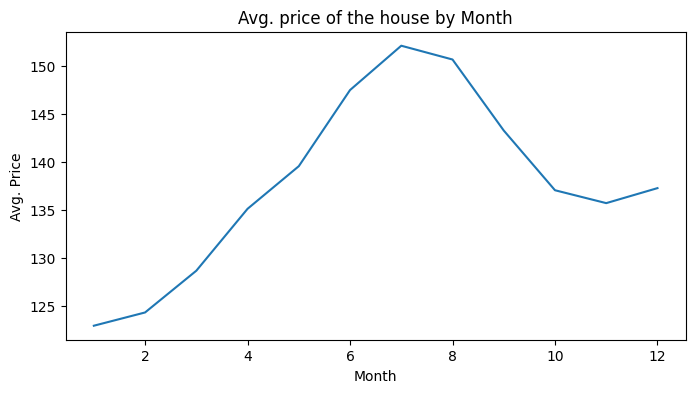

In [ ]:
# Calculate the average price per month
mon_avg_price = cal.groupby('mon')['price'].mean()

# Plot the average monthly price for all months
plt.figure(figsize=[8,4]);
plt.plot(mon_avg_price.index, mon_avg_price);
plt.xlabel('Month');
plt.ylabel('Avg. Price');
plt.title('Avg. price of the house by Month');

The most expensive months to Airbnb in Seattle appear to be July and August, with November through April being the least expensive.

- These months can be pricey, in our opinion, because:

1. how many homes are available this month?
2. Seattle's climate?
3. Seasonal Holiday?
4. Let's try to decipher the data to determine what causes the rise and fall in home prices.

- A futher analysis using visualization will determine which key features impact / drives the house price around the neighbourhood?
1. Which property types are most expensive?
2. Which room types are most expensive?
3. Which areas / zips are more expensive?

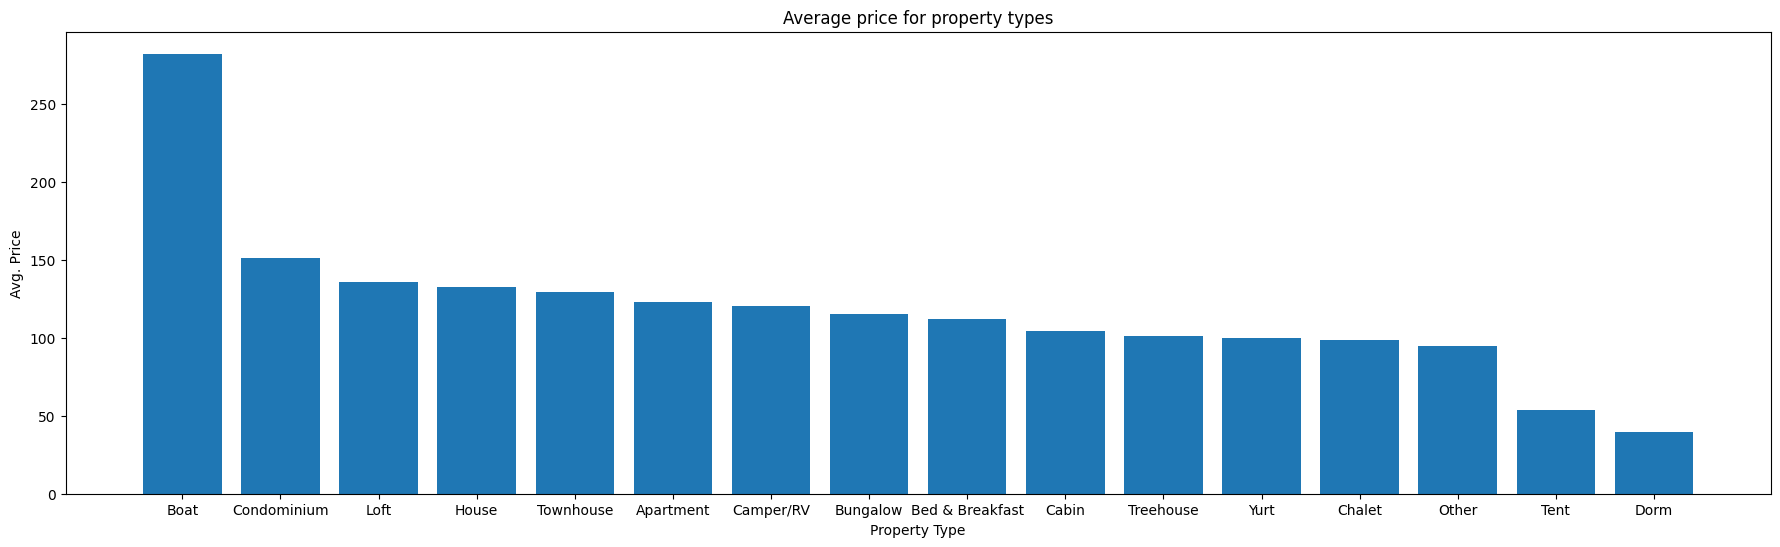

In [ ]:
# Check the average price for all property types
prop_price = lis.groupby('property_type')['price'].mean().sort_values(ascending = False)

# Plot the average price for all propert types
plt.figure(figsize=[22,6]);
plt.bar(prop_price.index, prop_price);
plt.xlabel('Property Type');
plt.ylabel('Avg. Price');
plt.title('Average price for property types');

2. Which room types are most expensive?

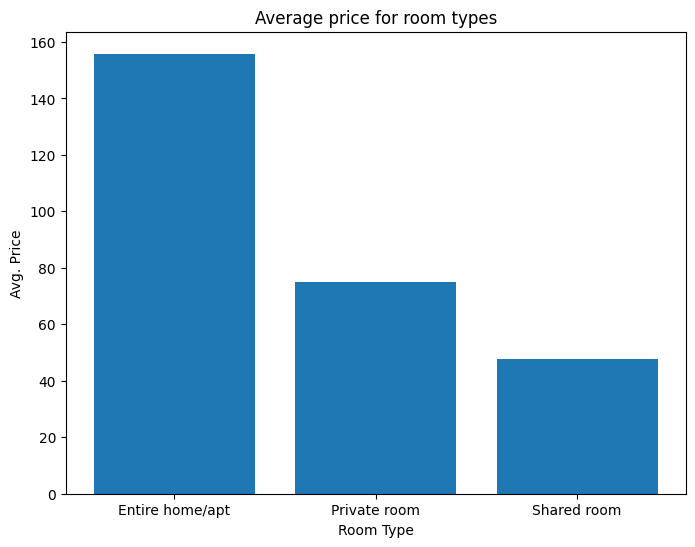

In [ ]:
# Check the average price for all room types
room_price = lis.groupby('room_type')['price'].mean().sort_values(ascending = False)

# Plot the average price for all room types
plt.figure(figsize=[8,6]);
plt.bar(room_price.index, room_price);
plt.xlabel('Room Type');
plt.ylabel('Avg. Price');
plt.title('Average price for room types');

3. Which areas / zips are more expensive?

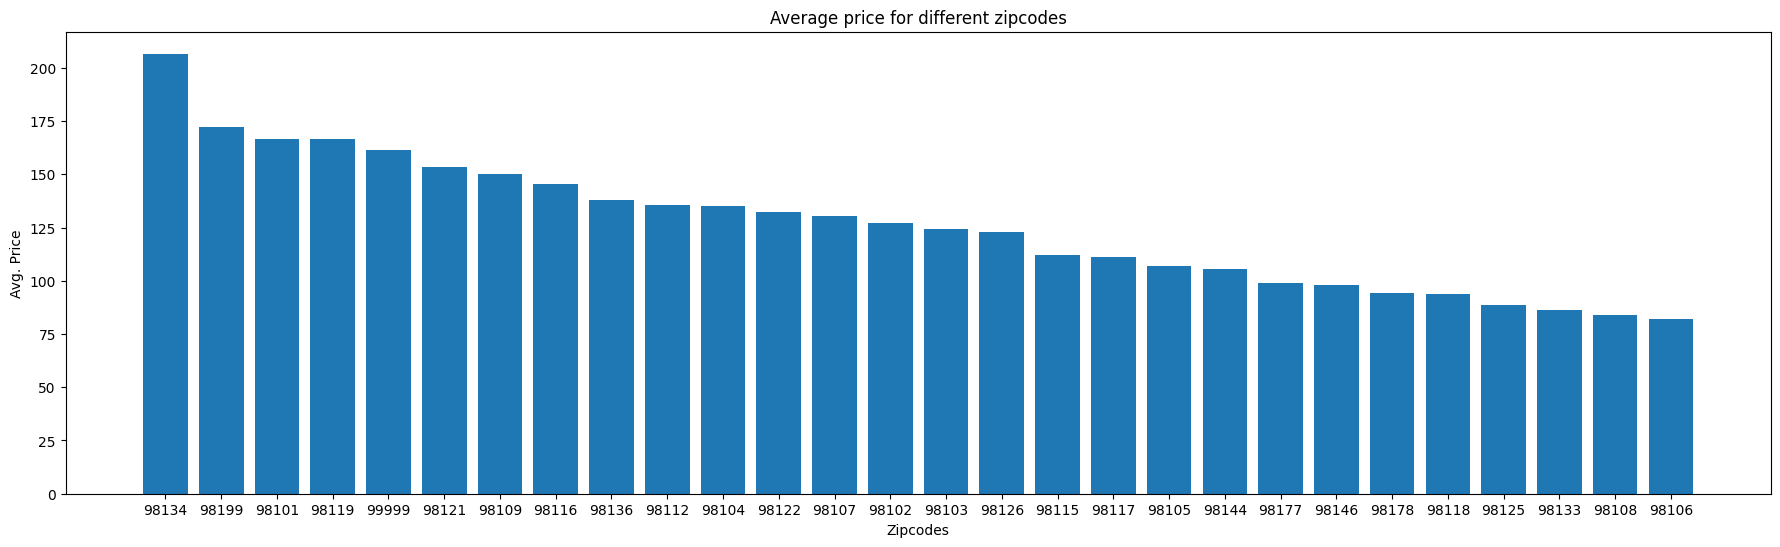

In [ ]:
# Check the average price for all zipcodes
zip_price = lis.groupby('zipcode')['price'].mean().sort_values(ascending = False)

# Plot the average price for all zipcodes
plt.figure(figsize=[22,6]);
plt.bar(zip_price.index, zip_price);
plt.xlabel('Zipcodes');
plt.ylabel('Avg. Price');
plt.title('Average price for different zipcodes');

In [ ]:
# Top 5 zipcodes based on avg house price
zip_price = pd.DataFrame(zip_price).reset_index()
top5_zip = zip_price.zipcode.head()

In [ ]:
# Number of houses in the top 5 expensive zipcodes
len(lis[lis['zipcode'].isin(top5_zip.values)])

422

**Research 1: Visual Analysis obervation:**

The Central Business District, Belltown, and Magnolia make up almost 50% of the 422 homes in the top 5 zipcodes, with Queen Anne housing representing 25% of those homes. The neighbourhood assessment of these locations reveals that they are lovely, peaceful streets with convenient parking. These neighbourhoods are also close to coffee shops, restaurants, grocery stores, nightlife, scenic vistas, and a lot more.

# **Research Question 2:**

### **What has been the most busiest time in Seattle?**

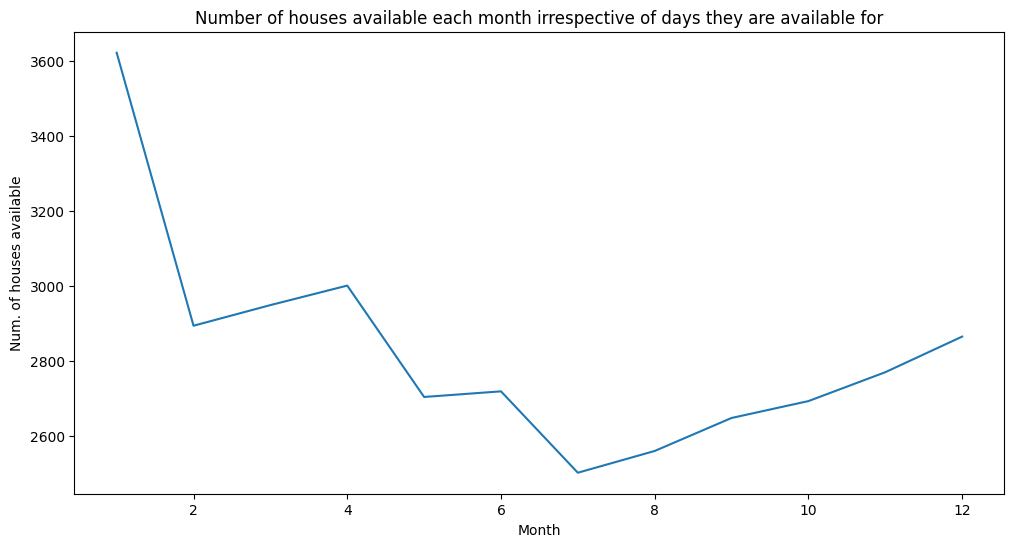

In [ ]:
# Unique count of the houses listed in a month
mon_avail = cal.groupby('mon')['listing_id'].nunique()

# Plot the number of unique houses for every month
plt.figure(figsize=[12,6]);
plt.plot(mon_avail.index, mon_avail);
plt.xlabel('Month');
plt.ylabel('Num. of houses available');
plt.title('Number of houses available each month irrespective of days they are available for');

The original hypotheses are supported by this. There are 3600 houses available in January out of the 3818 total homes listed on Airbnb, with at least one day of availability. The minimal number of residences, or 2,500, that are available for at least a day are found in July and August.

The next thing to do is to determine how many of these homes were available for more than 10 days in a month.

In [ ]:
# Count the number of days a house is available in a month
mon_lis_avail = cal.groupby(['mon','listing_id'],as_index=False)['date'].count().\
    sort_values(by= 'mon', ascending=False)
mon_lis_avail = mon_lis_avail.rename(columns={"date":"count"})

mon_lis_avail.head()

,mon,listing_id,count
33938,12,10340165,31
32013,12,3904056,31
32033,12,3977605,31
32032,12,3971934,31
32031,12,3971346,31


In [ ]:
# Filter for houses that have been available for over 10 days in a month
mon_lis_avail_over10 = mon_lis_avail[mon_lis_avail['count']>10]

In [ ]:
# Count the number of houses in a month that were available for over 10 days
mon_lis_avail_over10_count = mon_lis_avail_over10.groupby('mon')['listing_id'].count()
#mon_lis_avail_over10_count.head()

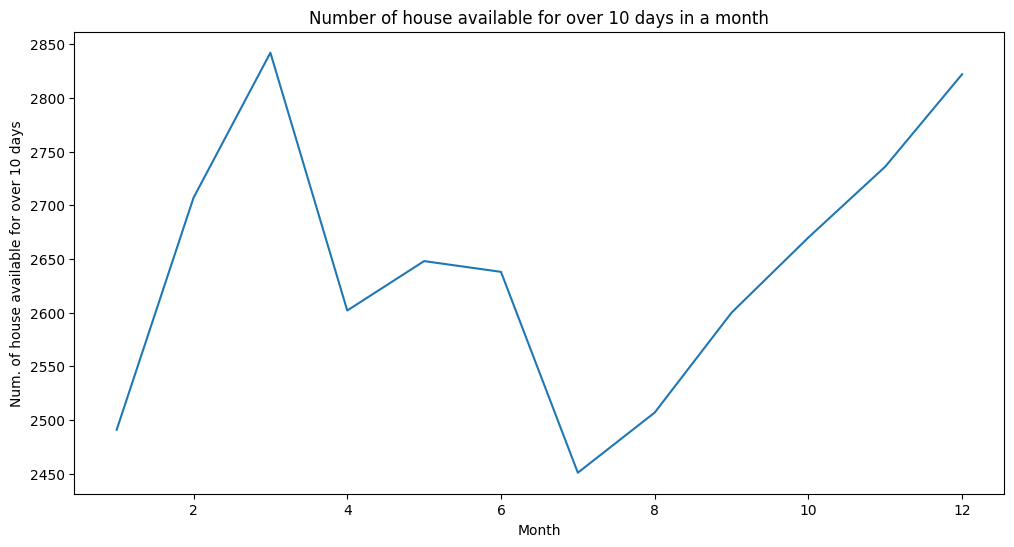

In [ ]:
# Plot the number of houses that were available for over 10 days in a month
plt.figure(figsize=[12,6]);
plt.plot(mon_lis_avail_over10_count.index, mon_lis_avail_over10_count);
plt.xlabel('Month');
plt.ylabel('Num. of house available for over 10 days');
plt.title('Number of house available for over 10 days in a month');

**Research 3 Visual Observation:**

The months with the highest number of houses available for more than 10 days, according to our observations, are March and December. If we compare the last two graphs, it appears that all 2,800 houses that were offered in December were accessible for longer than 10 days, with many of them accessible for the entire month.

As a result, there would have been fewer homes available for more than 10 days in January. This would have caused individuals to dramatically lower home prices the following month. Although the total number of houses available (about 3600) was at its greatest in January, about 1000 homes (or about 30% of all available homes in January) were occupied, according to the previous graph.

##**Research Question 3:**

**"How does the neighborhood have impact on price ?"**
- First of all, we should look at the prices each neighborhood**
- The we analyze which key features impact / drives the house price?
- Finally we predict the house prices after determing the important features that influence prices.

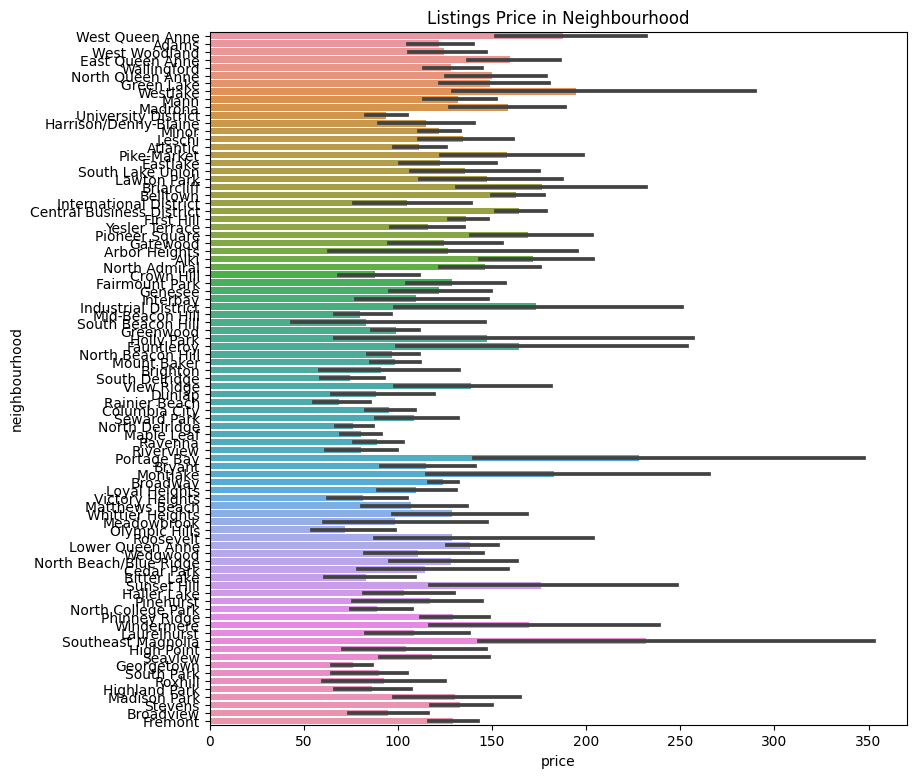

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(x="price", y="neighbourhood_cleansed", data=df, ax=ax).set(ylabel='neighbourhood', title="Listings Price in Neighbourhood");

The pictures shows that there are many neighbourhoods with very wide price range e.g. Portage Bay, Southeast Magnolia, Westlake. The statistical tables below would summarize the actual information about prices:

In [ ]:
# neighborhoods with high mean value
df_statistic_neighborhood = df.groupby(['neighbourhood_cleansed'])['price'].describe().reset_index()
df_statistic_neighborhood = df_statistic_neighborhood.sort_values(by=['mean'],ascending=False)
ten_expensive_neighborhood_mean = df_statistic_neighborhood[0:10]
df_statistic_neighborhood

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
73,Southeast Magnolia,17.0,231.705882,225.117682,48.0,110.00,150.0,250.00,950.0
61,Portage Bay,14.0,227.857143,197.523458,79.0,104.25,132.5,255.25,750.0
83,Westlake,17.0,194.470588,173.057475,65.0,85.00,150.0,200.00,775.0
81,West Queen Anne,65.0,187.769231,170.476425,20.0,90.00,130.0,175.00,975.0
48,Montlake,19.0,182.789474,171.700508,55.0,94.50,125.0,180.00,750.0
...,...,...,...,...,...,...,...,...,...
54,North Delridge,32.0,76.375000,26.881760,35.0,55.00,72.5,95.00,148.0
24,Georgetown,8.0,76.125000,15.994977,50.0,68.75,72.5,90.00,99.0
70,South Delridge,12.0,74.666667,31.804326,41.0,49.50,67.5,96.00,150.0
56,Olympic Hills,16.0,71.687500,48.098120,35.0,52.25,55.5,74.00,240.0


In [ ]:
# neighborhoods with high max value
df_statistic_neighborhood = df_statistic_neighborhood.sort_values(by=['max'],ascending=False)
df_statistic_neighborhood

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
65,Roosevelt,30.0,128.533333,169.039219,33.0,80.00,93.5,121.25,1000.0
4,Belltown,234.0,162.893162,110.523031,35.0,112.25,139.0,175.00,999.0
81,West Queen Anne,65.0,187.769231,170.476425,20.0,90.00,130.0,175.00,975.0
73,Southeast Magnolia,17.0,231.705882,225.117682,48.0,110.00,150.0,250.00,950.0
83,Westlake,17.0,194.470588,173.057475,65.0,85.00,150.0,200.00,775.0
...,...,...,...,...,...,...,...,...,...
54,North Delridge,32.0,76.375000,26.881760,35.0,55.00,72.5,95.00,148.0
64,Riverview,8.0,80.500000,29.456990,55.0,58.75,67.5,97.50,129.0
66,Roxhill,2.0,92.500000,45.961941,60.0,76.25,92.5,108.75,125.0
72,South Park,3.0,90.000000,21.794495,65.0,82.50,100.0,102.50,105.0


The most expensive areas are Southeast Magnolia, Portage Bay and Westlake looking at the mean for rent a day as well as std is also high. However, the most expensive properties (max) are in Roosevelt, Belltown and West Queen Anne approximately 1000 dollar a day.

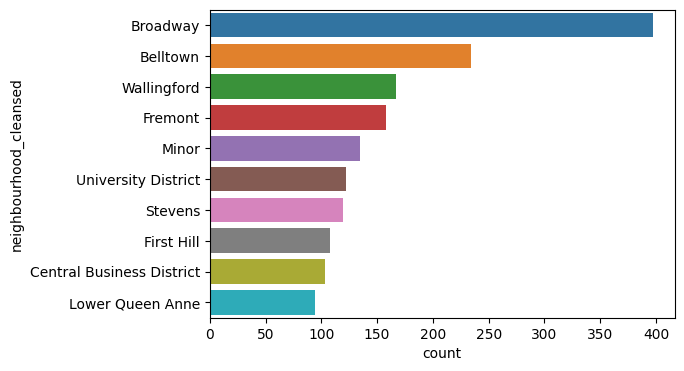

In [ ]:
# most popular neighborhoods
fig, ax = plt.subplots(figsize=(6, 4))
df_statistic_neighborhood = df_statistic_neighborhood.sort_values(by=['count'],ascending=False)
sns.barplot(x="count", y="neighbourhood_cleansed", data=df_statistic_neighborhood[0:10]);

In [ ]:
# most common neighborhood statistic
df_statistic_neighborhood[0:10]

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
9,Broadway,397.0,123.889169,77.628634,25.0,79.00,100.0,150.0,673.0
4,Belltown,234.0,162.893162,110.523031,35.0,112.25,139.0,175.0,999.0
79,Wallingford,167.0,128.431138,99.054779,39.0,65.00,100.0,152.5,680.0
21,Fremont,158.0,129.056962,80.948615,35.0,75.00,106.0,150.0,500.0
47,Minor,135.0,121.800000,69.760015,37.0,75.00,100.0,150.0,425.0
76,University District,122.0,93.639344,59.721816,28.0,53.50,85.0,105.0,350.0
74,Stevens,119.0,133.210084,97.235767,22.0,80.00,120.0,150.0,545.0
20,First Hill,108.0,136.425926,58.100815,40.0,100.00,127.0,166.0,500.0
12,Central Business District,103.0,164.213592,68.148001,40.0,118.50,149.0,185.5,365.0
38,Lower Queen Anne,94.0,138.202128,67.170875,38.0,96.25,119.0,172.5,498.0


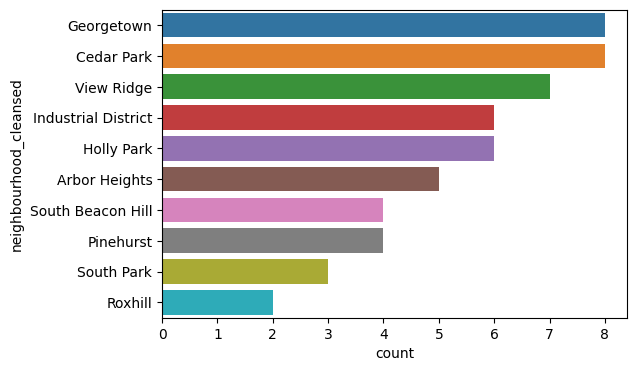

In [ ]:
# less popular neighborhoods
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="count", y="neighbourhood_cleansed", data=df_statistic_neighborhood[-10:]);

In [ ]:
# less popular neighborhoods statistic
df_statistic_neighborhood[-10:]

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
24,Georgetown,8.0,76.125000,15.994977,50.0,68.75,72.5,90.00,99.0
11,Cedar Park,8.0,114.625000,64.851341,55.0,77.50,90.5,125.25,250.0
78,View Ridge,7.0,139.000000,60.470378,49.0,115.00,125.0,162.50,244.0
32,Industrial District,6.0,173.333333,104.769588,25.0,135.00,150.0,236.25,320.0
31,Holly Park,6.0,147.166667,129.669452,45.0,52.50,99.0,195.75,375.0
2,Arbor Heights,5.0,126.800000,80.893139,54.0,55.00,100.0,200.00,225.0
69,South Beacon Hill,4.0,83.250000,62.039638,38.0,54.50,60.0,88.75,175.0
59,Pinehurst,4.0,117.250000,42.742446,55.0,107.50,132.0,141.75,150.0
72,South Park,3.0,90.000000,21.794495,65.0,82.50,100.0,102.50,105.0
66,Roxhill,2.0,92.500000,45.961941,60.0,76.25,92.5,108.75,125.0


The result shows, that in the expensive areas with the high prices is the demand still high in comparison to the neighborhood with the lower prices.

Since the apartments and houses are rented the most, it is interesting to look at the price range for this types of rents following down.

In [ ]:
df_stat_property_n = df.groupby(['neighbourhood_cleansed', 'property_type'])['price'].describe().reset_index()
df_stat_property_n = df_stat_property_n[df_stat_property_n['property_type'].isin(['House','Apartment'])]
df_stat_property_n.sort_values(by=['max'],ascending=False)

,neighbourhood_cleansed,property_type,count,mean,std,min,25%,50%,75%,max
266,Roosevelt,House,16.0,167.937500,225.937003,39.0,85.00,105.0,149.25,1000.0
21,Belltown,Apartment,208.0,159.451923,102.826422,35.0,114.50,139.0,175.00,999.0
323,West Queen Anne,House,33.0,247.393939,214.222714,45.0,99.00,150.0,350.00,975.0
285,Southeast Magnolia,House,10.0,234.100000,266.031514,68.0,98.75,117.5,244.50,950.0
202,Montlake,House,15.0,191.533333,192.865929,55.0,87.00,115.0,195.00,750.0
...,...,...,...,...,...,...,...,...,...,...
92,Gatewood,Apartment,2.0,80.000000,7.071068,75.0,77.50,80.0,82.50,85.0
295,Sunset Hill,Apartment,1.0,85.000000,NaN,85.0,85.00,85.0,85.00,85.0
26,Bitter Lake,Apartment,3.0,67.333333,9.451631,60.0,62.00,64.0,71.00,78.0
216,North Beach/Blue Ridge,Apartment,1.0,75.000000,NaN,75.0,75.00,75.0,75.00,75.0


In [ ]:
# sort most expensive_neighbourhoods mean
most_expensive_neighbourhoods_names = list(ten_expensive_neighborhood_mean.neighbourhood_cleansed)
most_expensive_neighbourhoods_names

['Southeast Magnolia',
 'Portage Bay',
 'Westlake',
 'West Queen Anne',
 'Montlake',
 'Briarcliff',
 'Sunset Hill',
 'Industrial District',
 'Alki',
 'Windermere']

In [ ]:
# statistic for houses and apartments for most expensive areas
df_stat_property_house_apartment = df_stat_property_n[df_stat_property_n['neighbourhood_cleansed'].isin(most_expensive_neighbourhoods_names)]
df_stat_property_house_apartment

,neighbourhood_cleansed,property_type,count,mean,std,min,25%,50%,75%,max
7,Alki,Apartment,13.0,97.923077,44.699854,40.0,90.00,95.0,100.00,219.0
9,Alki,House,24.0,210.125000,101.505328,79.0,116.50,230.0,276.75,399.0
28,Briarcliff,Apartment,2.0,97.500000,3.535534,95.0,96.25,97.5,98.75,100.0
29,Briarcliff,House,12.0,189.750000,98.686948,69.0,99.00,175.0,231.25,375.0
129,Industrial District,Apartment,2.0,140.000000,14.142136,130.0,135.00,140.0,145.00,150.0
201,Montlake,Apartment,3.0,133.333333,23.629078,115.0,120.00,125.0,142.50,160.0
202,Montlake,House,15.0,191.533333,192.865929,55.0,87.00,115.0,195.00,750.0
252,Portage Bay,Apartment,6.0,113.833333,30.393530,79.0,92.25,109.5,131.25,160.0
253,Portage Bay,House,7.0,340.285714,232.921098,90.0,190.00,257.0,452.50,750.0
284,Southeast Magnolia,Apartment,5.0,219.600000,195.213473,48.0,125.00,150.0,225.00,550.0


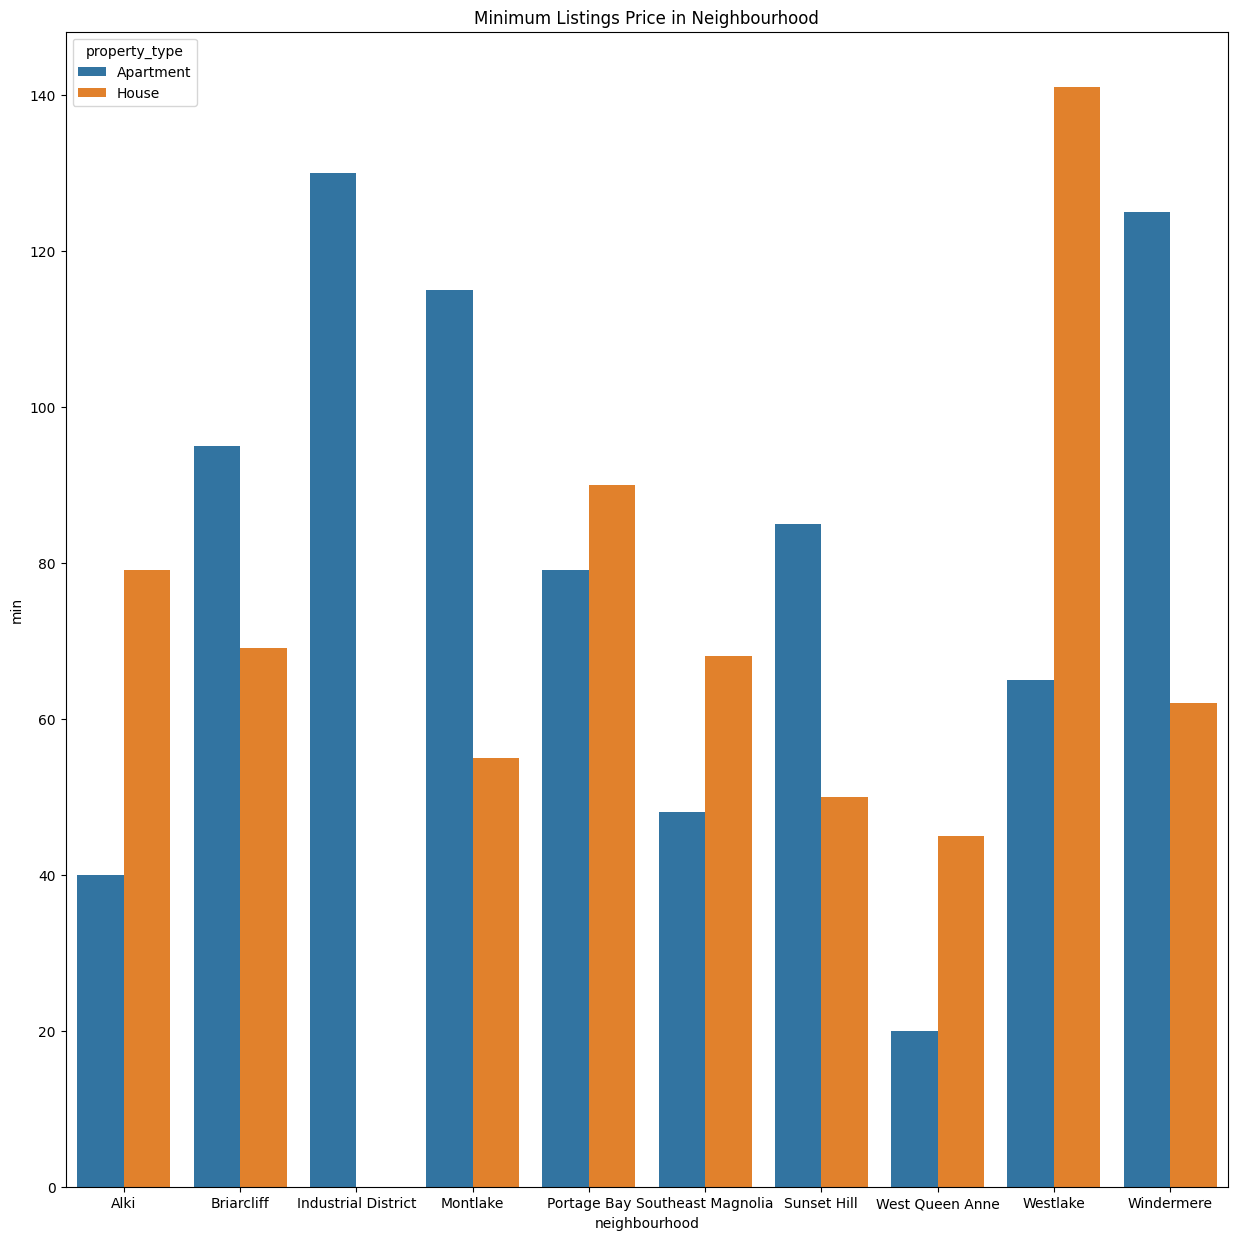

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x="neighbourhood_cleansed", y="min", hue="property_type", \
            data=df_stat_property_house_apartment, ax=ax).set(xlabel='neighbourhood', \
                                                              title="Minimum Listings Price in Neighbourhood");

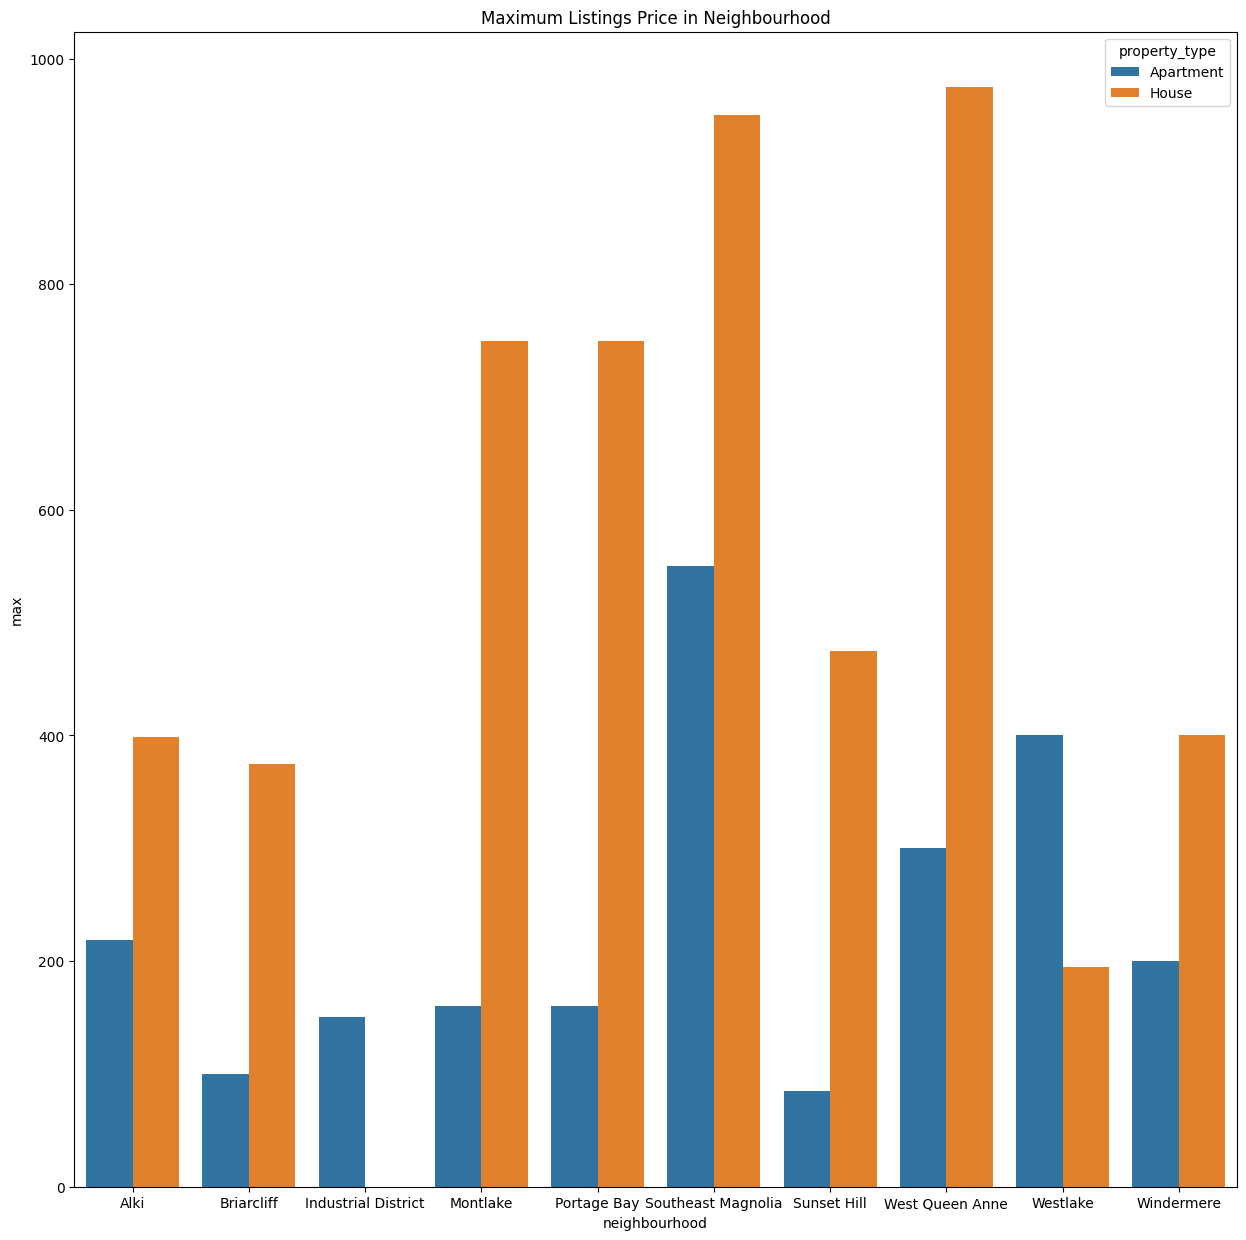

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x="neighbourhood_cleansed", y="max", hue="property_type", data=df_stat_property_house_apartment,\
            ax=ax).set(xlabel='neighbourhood', title="Maximum Listings Price in Neighbourhood");

The figures show that the maximum as well as minimum price of the houses is almost more expensive than apartments. Nevertheless, in some areas the start price for apartments is even higher than for a house e.g. Windermere or Briarcliff, however it were only 2 to 3 apartments rented.

In [ ]:
#  sorting by neighbourhood, property_type and square_feet
df_stat_property_n_square_feet = df.groupby(['neighbourhood_cleansed', 'property_type','square_feet'])['price'].describe().reset_index()
df_stat_property_n_square_feet = df_stat_property_n_square_feet[df_stat_property_n_square_feet['property_type'].isin(['House','Apartment'] )]
df_stat_property_n_square_feet.sort_values(by=['max'],ascending=False)

,neighbourhood_cleansed,property_type,square_feet,count,mean,std,min,25%,50%,75%,max
14,Broadway,House,2600.0,1.0,673.0,NaN,673.0,673.00,673.0,673.00,673.0
72,North Queen Anne,House,3000.0,1.0,395.0,NaN,395.0,395.00,395.0,395.00,395.0
36,Fairmount Park,House,3000.0,1.0,370.0,NaN,370.0,370.00,370.0,370.00,370.0
13,Broadway,House,1850.0,1.0,360.0,NaN,360.0,360.00,360.0,360.00,360.0
17,Broadway,Apartment,1200.0,2.0,237.5,123.743687,150.0,193.75,237.5,281.25,325.0
...,...,...,...,...,...,...,...,...,...,...,...
67,North Admiral,House,800.0,1.0,60.0,NaN,60.0,60.00,60.0,60.00,60.0
46,Green Lake,House,2000.0,1.0,60.0,NaN,60.0,60.00,60.0,60.00,60.0
49,Greenwood,House,1300.0,2.0,52.5,3.535534,50.0,51.25,52.5,53.75,55.0
74,Olympic Hills,House,250.0,1.0,54.0,NaN,54.0,54.00,54.0,54.00,54.0


In [ ]:
# sorting for most expensive neighbourhood, property_type and square_feet
df_stat_property_n_square_feet = df_stat_property_n_square_feet[df_stat_property_n_square_feet['neighbourhood_cleansed'].isin(most_expensive_neighbourhoods_names)]
df_stat_property_n_square_feet

,neighbourhood_cleansed,property_type,square_feet,count,mean,std,min,25%,50%,75%,max
2,Alki,House,1400.0,1.0,240.0,NaN,240.0,240.0,240.0,240.0,240.0
63,Montlake,House,900.0,1.0,129.0,NaN,129.0,129.0,129.0,129.0,129.0


In [ ]:
# Here are the neighbourhood based on the top 5 expensive zipcodes
top_neighbourhood = lis[lis['zipcode'].isin(top5_zip.values)]['host_neighbourhood']
top_neighbourhood.value_counts()

Queen Anne                   103
Central Business District     57
Belltown                      54
Magnolia                      51
First Hill                    43
Lower Queen Anne              25
Pike Place Market             22
Anaheim                        6
Capitol Hill                   4
Interbay                       4
Industrial District            3
Pioneer Square                 2
Madison Park                   2
Fenway/Kenmore                 2
Hollywood                      2
Ballard                        1
Leschi                         1
International District         1
Northwest District             1
Downtown Toronto               1
Portage Bay                    1
Waianae Coast                  1
Huntington Beach               1
Name: host_neighbourhood, dtype: int64

In [ ]:
# Filtering the top 5 neighbourhood areas
top5_neighbourhood = top_neighbourhood.value_counts().head()
top5_neighbourhood

Queen Anne                   103
Central Business District     57
Belltown                      54
Magnolia                      51
First Hill                    43
Name: host_neighbourhood, dtype: int64

- A further factor to consider when comparing pricing is the relationship between the purchase price, square footage, and neighbourhood. However, as stated above,  i am unable to make that conclusion from the data due to the limitations of the square feet data. We observed the Finally, we can determine the final 3 top neighbourhood areas is "Queen Anne 103, Central Business District 57
Belltown 54"






**Determining the overall features that drive house pricing**

In this part, I will predict the listing price in the listing dataset. 44 variables in this listing dataset have missing values, variables with majority of missing values will be dropped from the analysis. In this analysis, only 10 variables will be used for prediction: 5 continous variables, 5 categorical variables

In [ ]:
(lis.num_of_amenities).corr(lis.reviews_per_month)

0.0741366381166345

There is a strong positive correlation (+0.7) between the amount of amenities offered and the number of evaluations that residence has received. While we acknowledge that having more amenities does not necessarily translate into a higher price, we are merely pointing out how closely the two are related.


In [ ]:
# Define the features and target variable
X = lis[['host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count', \
         'host_has_profile_pic', 'host_identity_verified','latitude','longitude','is_location_exact','accommodates', 'bathrooms',\
         'bedrooms','beds','cleaning_fee','guests_included','extra_people_price','minimum_nights','maximum_nights',\
         'has_availability','number_of_reviews','review_scores_rating','review_scores_accuracy',\
         'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',\
         'review_scores_value','instant_bookable','require_guest_profile_picture',\
         'require_guest_phone_verification','reviews_per_month','security_deposit_Y/N', 'host_active_years', \
         'num_of_amenities', 'num_of_verifications','host_response_time_within a day', \
         'host_response_time_within a few hours','host_response_time_within an hour',\
         'property_type_Bed & Breakfast','property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin',\
         'property_type_Camper/RV', 'property_type_Chalet','property_type_Condominium', 'property_type_Dorm', \
         'property_type_House', 'property_type_Loft', 'property_type_Other','property_type_Tent', \
         'property_type_Townhouse','property_type_Treehouse', 'property_type_Yurt','room_type_Private room', \
         'room_type_Shared room', 'bed_type_Couch','bed_type_Futon', 'bed_type_Pull-out Sofa', \
         'bed_type_Real Bed','cancellation_policy_moderate', 'cancellation_policy_strict']]
y = lis['price']

In [ ]:
# Spliting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from functools import partial# import packages and set  plot to be embedded
from sklearn.feature_selection import SelectKBest, mutual_info_regression
# Use SelectKBest to identify the top 20 features driving the price
# Use mutual_info_regression as the score_func since we have a mix of categorical and continuoue variables and \
# our target variable is continuous
score_func = partial(mutual_info_regression)
select = SelectKBest(score_func, k=20)
feature_train_transformed = select.fit_transform(X_train,y_train)
feature_test_transformed = select.fit_transform(X_test,y_test)

In [ ]:
# Update the dataframe based on the new feature list
cols = select.get_support(indices=True)
X_train_new = X_train.iloc[:,cols]
X_test_new = X_test.iloc[:,cols]

In [ ]:
# Get the raw score for each feature, we use '-' to sort the array in descending order
scores = -np.sort(-select.scores_)
top20_scores = scores[:20]

In [ ]:
# The top 20 features list
predictors = list(X_train_new.columns)

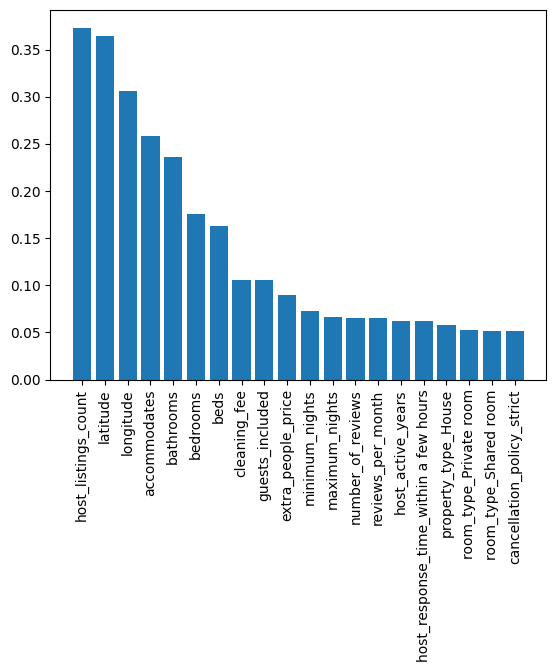

In [ ]:
# Plot the scores for the top 20 features to visualize the impact of these features on price
plt.bar(range(len(predictors)), top20_scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

**We can see that the following factors have had the most effects on the pricing of Airbnb:**

- How many listings each host has,
- region of the home (we alreasy saw above analysing the zipcodes and neighbourhood)
- How many people can it accommodate, how many bathrooms and beds are accessible, and the additional costs for more guests and cleaning
- Minimum and maximum nights booked; reviews received; years host has been in business; minimum and maximum nights booked
- If the host is authentic,
- Property kind and room (we already seen how pricey boats and complete homes/apartments are)


The number of listings the host has and the location of the house are the two attributes that have the biggest impact on price out of all the others. The particular neighbourhood with the highest prices is identified by the preceding analysis, with "Queen Anne" topping the list. In addition, we discovered that when compared to other property kinds, boats had the highest average price. Condominiums, lofts, houses, etc. come next. The average cost of a private room is approximately double (2X) that of a shared room, as might be expected.

**Wordcloud & Top-grams analysis**

To assess the preferred **"Positive words"** guests used to describe their experience, I create wordclouds for the positive comments.

Step 1: Visualize the top n-grams with seaborn package and popular words in comment texts using WordCloud package

In [ ]:
pip install vaderSentiment

In [ ]:
# import packages for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction import text

In [ ]:
# First step: Remove stopwords, non-word characters from the comment text
eng_stopword = set(text.ENGLISH_STOP_WORDS)
reviews['tidy_cm'] = reviews['comments'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>1]))
reviews['tidy_cm'] = reviews['tidy_cm'].str.split().apply(lambda x: ' '.join(k for k in x if k.lower() not in eng_stopword))
reviews['tidy_cm'] = reviews['tidy_cm'].str.replace("n't", " not")
reviews['tidy_cm'] = reviews['tidy_cm'].str.replace("'s", " ")
reviews['tidy_cm'] = reviews['tidy_cm'].str.replace(r"[^a-zA-Z']", " ")

<ipython-input-122-1cc1609796b4>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['tidy_cm'] = reviews['tidy_cm'].str.replace(r"[^a-zA-Z']", " ")


In [ ]:
#drop missing comments
reviews = reviews.dropna(subset =['comments'],how='any')
reviews.shape[0]

84831

**WorLD cLOUD**

In [ ]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, bigrams, FreqDist, ne_chunk


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Import mask image for wordcloud
house_mask = np.array(Image.open("/content/house3.png"))

In [ ]:
# Create the frequency distribution for each word in text
comments = ' '.join([text.lower() for text in reviews['tidy_cm']])
comments_dist = nltk.FreqDist(word for word in word_tokenize(comments))
comments_dist

FreqDist({'great': 60982, 'stay': 52127, 'place': 45535, 'seattle': 40319, 'clean': 29360, 'location': 28761, 'apartment': 26031, 'comfortable': 25214, 'nice': 23168, 'house': 22938, ...})

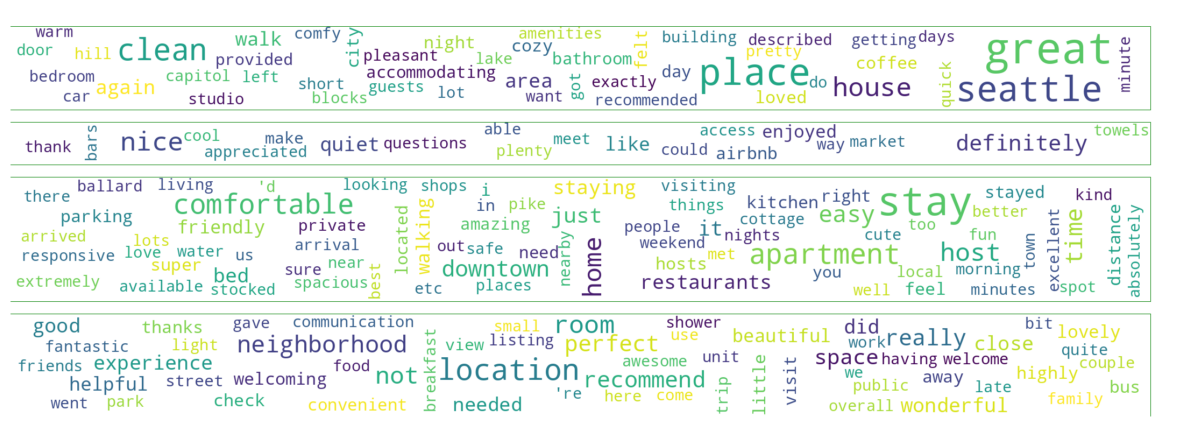

In [ ]:
# Create wordcloud for all comments
wordcloud = WordCloud(width=800, height=500,background_color='white', max_font_size=80, stopwords=set(),random_state=42,\
                      mask=house_mask,contour_width=0.5,contour_color='Green')
wordcloud.generate_from_frequencies(comments_dist)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

The wordcount lists out positive reviews from customers

##**Conclusion:**
* The analysis of the Seattle Airbnb data revealed that the area is a popular tourist destination due to its stunning natural surroundings. The average monthly cost of the residence fluctuates from 120 to 125 based on a variety of variables, with the season being a major determinant.
* In addition, we were able to determine which zip codes and neighbourhoods were the most costly. Queen Anne came out on top, closely followed by the Central Business District, Belltown, and Magnolia. A few factors explaining the high prices in these places are the simple transportation, easier access to areas with necessities, and the area's attractions.
* The busiest and most expensive months of the year, with an average monthly price of up to $150, were found to be July and August. The months of November and December are the slowest, with many houses being available to reserve for the entire month. This quiet season seems to last from November until April. The summer months of July and August in Seattle tend to have good weather, and the holiday in July may also play a role in this.
* There is a tendency where hosts lower their asking fees and may even provide discounts or promotions to entice guests during the sluggish months. This is particularly evident in December, January, and to a lesser extent in March and April, when reduced pricing followed a slow month with no bookings and led to a corresponding rise in bookings. After April, the price continues to rise until late August or early September, when it then begins to decrease once more.
* Other factors that drove and had an impact on the house included the hosts' dependability and reputation, the availability of beds and bathrooms as well as other amenities, and any additional costs related to the host. The kind of property and the number of rooms had a major impact on the cost of a house.